In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Standard Units

In [2]:
def standard_units(x):
    """Convert the array x to standard units"""
    return (x - np.mean(x)) / np.std(x)

In [3]:
births = Table().read_table('baby.csv')

In [4]:
births.labels

('Birth Weight',
 'Gestational Days',
 'Maternal Age',
 'Maternal Height',
 'Maternal Pregnancy Weight',
 'Maternal Smoker')

In [5]:
ages = births.column('Maternal Age')

In [6]:
ages_in_standard_units = standard_units(ages)

In [7]:
np.average(ages_in_standard_units), np.std(ages_in_standard_units)

(-7.868020072300939e-17, 1.0)

In [8]:
both = Table().with_columns(
    'Age in Years', ages, 
    'Age in Standard Units', ages_in_standard_units
)

In [9]:
both

Age in Years,Age in Standard Units
27,-0.0392546
33,0.992496
28,0.132704
23,-0.727088
25,-0.383171
33,0.992496
23,-0.727088
25,-0.383171
30,0.476621
27,-0.0392546


In [10]:
np.mean(ages), np.std(ages)

(27.228279386712096, 5.815360404190897)

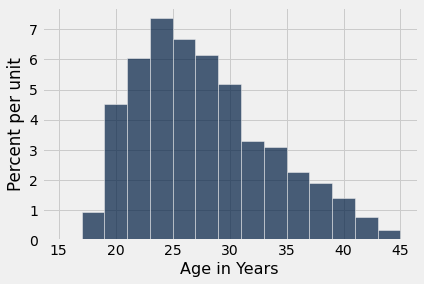

In [11]:
both.hist('Age in Years', bins = np.arange(15, 46, 2))

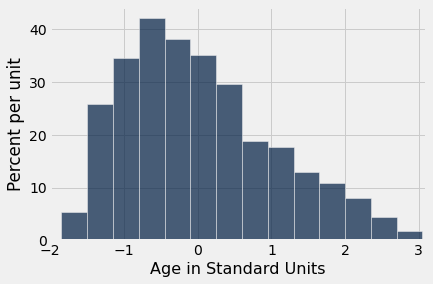

In [12]:
both.hist('Age in Standard Units', bins = np.arange(-2.2, 3.4, 0.35))
plots.xlim(-2, 3.1);

## The SD and Bell Shaped Curves

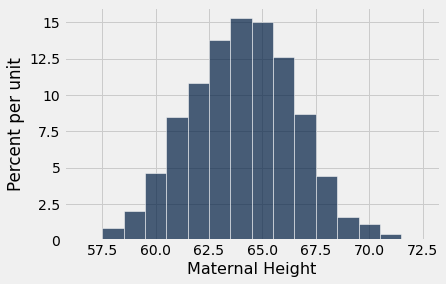

In [14]:
births.hist('Maternal Height', bins = np.arange(56.5, 72.6, 1), ec='w')

In [15]:
heights = births.column('Maternal Height')
np.average(heights), np.std(heights)

(64.04940374787053, 2.5250254409674375)

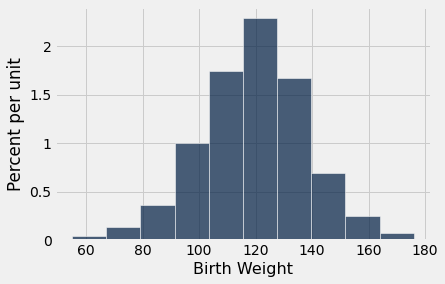

In [17]:
births.hist('Birth Weight', ec='w')

In [18]:
bw = births.column('Birth Weight')
np.average(bw), np.std(bw)

(119.46252129471891, 18.32086370220278)

## Central Limit Theorem

In [23]:
united = Table.read_table('https://raw.githubusercontent.com/data-8/textbook/main/assets/data/united_summer2015.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


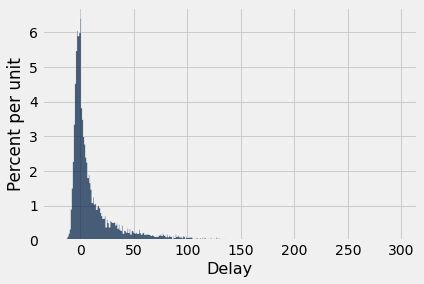

In [24]:
united.hist('Delay', bins = np.arange(-20, 300, 1), ec='w')

In [25]:
sample_size = 500

averages = make_array()

for i in np.arange(10000):
    sampled_flights = united.sample(sample_size)
    sample_average = np.average(sampled_flights.column('Delay'))
    averages = np.append(averages, sample_average)

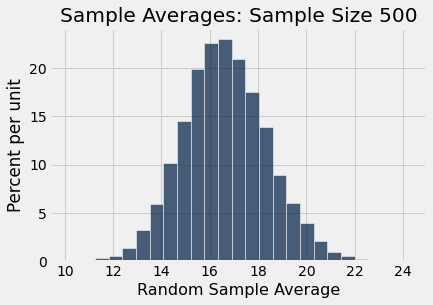

In [26]:
Table().with_column('Sample Average', averages).hist(bins = 25, ec='w')
plots.title('Sample Averages: Sample Size ' + str(sample_size))
plots.xlabel('Random Sample Average');

In [28]:
# Population average
pop_ave = np.average(united.column('Delay'))
pop_ave

16.658155515370705